#Exercícios de Física Computacional
##Folha 8
1. Resolva a equação
dx/dt = −x**3 + sin(t),
usando o método de Euler sabendo que x(t = 0) = 0.

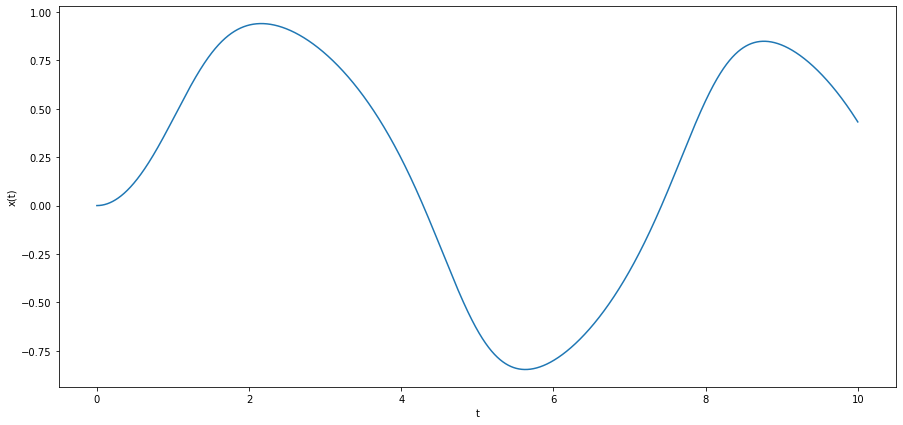

In [ ]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show,figure

def f(x,y):
  return -x**3 + sin(t)

a = 0.0 #início do intervalo
b = 10.0 #fim do intervalo
N = 100000 #número de passos
h = (b-a)/N #tamanho de um passo
x = 0.0 #condição inicial

tpoints = arange(a,b,h)
xpoints = []
for t in tpoints:
  xpoints.append(x)
  x += h*f(x,t)

figure(figsize=[15,7])
plot(tpoints,xpoints)
xlabel('t')
ylabel('x(t)')
show()

2. Resolva a equação
dx/dt = −x**3 + sin(t),
usando os métodos de Runge-Kutta de segunda e quarta ordem, sabendo
que x(t = 0) = 0. Compare, no mesmo gráfico, N = 10, 20, 50, 100. Sugestão: fazer um gráfico para os cada um dos métodos onde se comparem os
vários N.

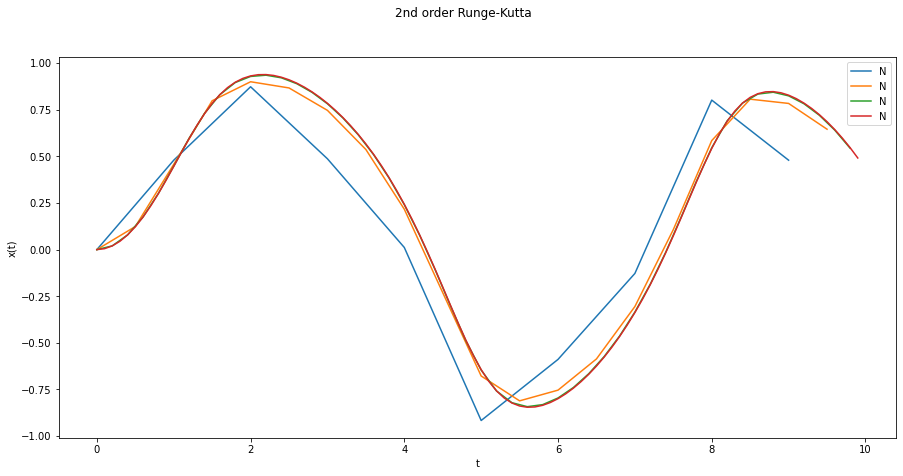

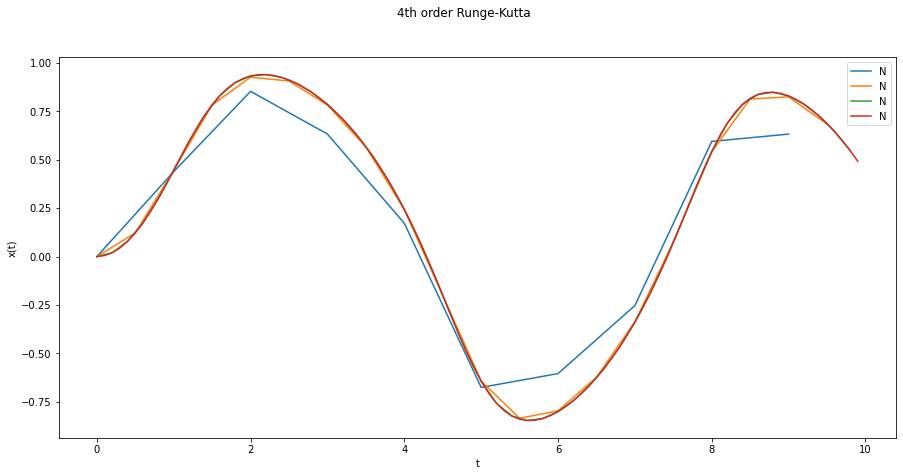

In [ ]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show,figure,legend,suptitle

def f(x,t):
  return -x**3 + sin(t)

def rk2(N):
  a = 0.0
  b = 10.0
  h = (b-a)/N

  tpoints = arange(a,b,h)
  xpoints = []
  x = 0.0
  for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2
  plot(tpoints,xpoints,label='N')

def rk4(N):
  a = 0.0
  b = 10.0
  h = (b-a)/N

  tpoints = arange(a,b,h)
  xpoints = []
  x = 0.0
  for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6
  plot(tpoints,xpoints,label='N')

figure(figsize=[15,7])
rk2(10)
rk2(20)
rk2(50)
rk2(100)
legend()
xlabel('t')
ylabel('x(t)')
suptitle('2nd order Runge-Kutta')
show()

figure(figsize=[15,7])
rk4(10)
rk4(20)
rk4(50)
rk4(100)
legend()
xlabel('t')
ylabel('x(t)')
suptitle('4th order Runge-Kutta')
show()

3. O oscilador de van der Pol, que aparece em eletrónica e física dos lasers,
é descrito pela equação:

d^2x/ dt^2
− µ(1 − x^2
)
dx/dt + ω^2x = 0.

Resolva esta equação numericamente entre t = 0 to t = 50, representando o correspondente diagrama de espaço de fase (i.e. dx/dt em função
de x) para ω = 1, µ = 5, e condições iniciais x = 1 e dx/dt = 0. Tenha em
atenção que o intervalo de tempo deve ser suficientemente pequeno para
que o diagrama obtido seja suficientemente suave e preciso.


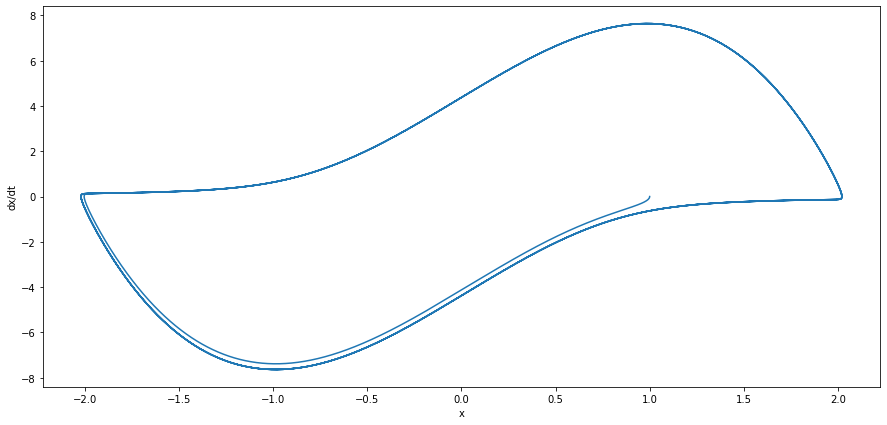

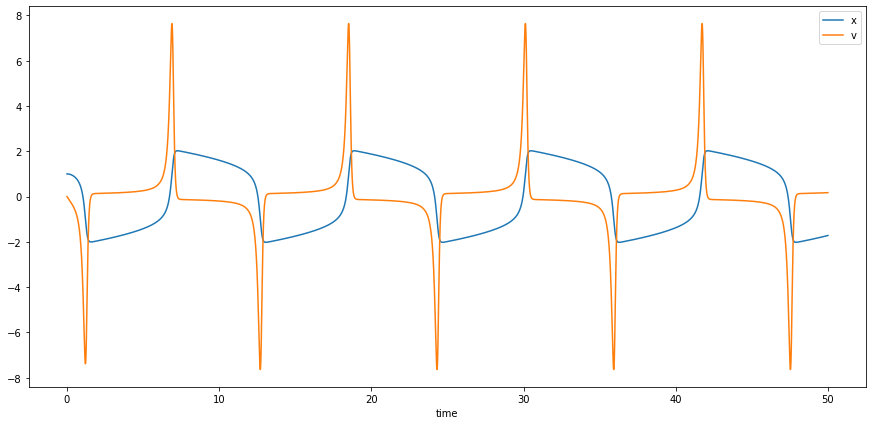

In [ ]:
from numpy import array, arange
from pylab import plot, show, xlabel, ylabel, figure, legend

mu = 5.0
omega = 1.0
a = 0.0
b = 50.0
N = 500000
h = (b-a)/N

def f(r,t):
  x = r[0]
  v = r[1]
  fx = v
  fv = - omega**2 * x + mu*(1-x*x)*v
  return array ([fx,fv], float)

#initial values
x = 1.0
v = 0.0

r = array([x,v],float)

tpoints = arange(a,b,h)
xpoints = []
vpoints = []

#main loop
for t in tpoints:
  xpoints.append(r[0])
  vpoints.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1, t+0.5*h)
  k3 = h*f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6

#plots
figure(figsize=[15,7])
plot(xpoints,vpoints)
xlabel("x")
ylabel("dx/dt")
show()

figure(figsize=[15,7])
plot(tpoints,xpoints,label='x')
plot(tpoints,vpoints,label='v')
legend()
xlabel("time")
show()

4. Considere um circuito RC com uma resistência e um condensador.
Este circuito atua com um filtro passa baixo, modificando o sinal injetado
Vin no sinal Vout. Se I for a corrente que passa pela resistência R e pelo
condensador de capacidade C, mostre que:

* IR = Vin − Vout , Q = C*Vout , I=dQ/dt.

Substituindo a segunda equação na terceira e usando o resultado na primeira equação temos que Vin−Vout = RC (dVout/dt) ou, equivalentemente,

* dVout/dt =1/RC(Vin − Vout)

(a) Escreva um programa que resolva esta equação para Vout(t) usando
o método de Euler. Assuma que o sinal de entrada é uma onda
quadrada com frequência 1 e amplitude 1:


* Vin(t)= 1 se [2t] é par , Vin(t) = -1 se [2t] é ímpar,

onde [x] significa que x é arredondado por baixo para o inteiro mais
próximo.


In [ ]:
def Vin(t):
    if np.floor(2*t)%2==0: #arredonda os valores ao inteiro abaixo
        return 1
    else:
        return -1

def Vout_deriv(a,b,RC): #a=Vin e b=Vout, é a derivada de Vout em função do tempo
    return (Vin(a)-b)/RC 

def eq_diff(f,a,b,N,rc): #intervalo de valores[a,b], N->espaçamentos no intervalor [a,b], f->derivada de Vout em função do tempo
    h=(b-a)/N                                                                                                      
    Vout=0.0 #condição Vout(0)=0
    t_p=np.arange(a,b,h)
    Vout_p=[]
    for t in t_p:
        Vout+=h*f(t,Vout,rc)
        Vout_p.append(Vout)
    return [t_p,Vout_p,len(t_p)]

def w_corte(x):
    return 2*np.pi/x

RC_1=0.01
Vout_aprox1=eq_diff(Vout_deriv,0,10,1000,RC_1)

RC_2=0.1
Vout_aprox2=eq_diff(Vout_deriv,0,10,1000,RC_2)

RC_3=1
Vout_aprox3=eq_diff(Vout_deriv,0,10,1000,RC_3)

RC_3=10
Vout_aprox4=eq_diff(Vout_deriv,0,10,1000,RC_3)

Vin_0=[] #array que guarda os valores do Vin para os tempos utilizados
for i in range(0, Vout_aprox1[2]):
    Vin_0.append(Vin(Vout_aprox1[0][i]))
    
V_0=np.zeros(len(Vout_aprox1[0]))

#calculo dos coeficientes fourier
fft_Vin=np.fft.rfft(Vin_0)
fft_Vout_1=np.fft.rfft(Vout_aprox1[1]) #coeficientes de fourier da tensão de saída RC=0.01s
fft_Vout_2=np.fft.rfft(Vout_aprox2[1]) #coeficientes de fourier da tensão de saída RC=0.1s
fft_Vout_3=np.fft.rfft(Vout_aprox3[1]) #coeficientes de fourier da tensão de saída RC=1s
fft_Vout_4=np.fft.rfft(Vout_aprox4[1]) #coeficientes de fourier da tensão de saída RC=10s

(b) Compare o sinal de entrada e saída para RC = 0.01, 0.1, e 1 s, assumindo a condição inicial Vout(0) = 0. Considere o intervalo t = 0 a
t = 10 s e discuta a importância do passo considerado na resolução
da equação diferencial.

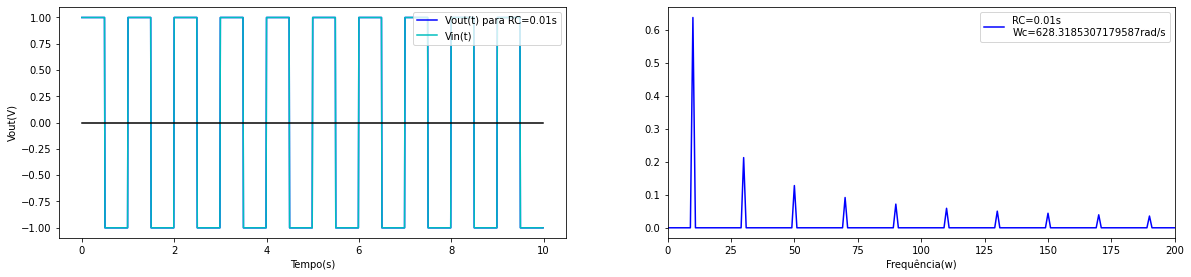

In [ ]:
#print das funções
plt.figure(figsize=(20,40))

#para RC=0.01s
plt.subplot(821)
plt.plot(Vout_aprox1[0],Vout_aprox1[1],'b',label="Vout(t) para RC=0.01s")
plt.plot(Vout_aprox1[0],Vin_0,'c',label="Vin(t)")
plt.plot(Vout_aprox1[0],V_0,'k')
plt.xlabel("Tempo(s)")
plt.ylabel("Vout(V)")
plt.legend()

plt.subplot(822)
plt.plot(abs(fft_Vout_1)/Vout_aprox1[2],'b',label="RC=0.01s\nWc="+str(w_corte(0.01))+"rad/s") #plot dos coeficientes de fourier da tensão de saída
plt.xlim(0,200)
plt.xlabel("Frequência(w)")
plt.legend()

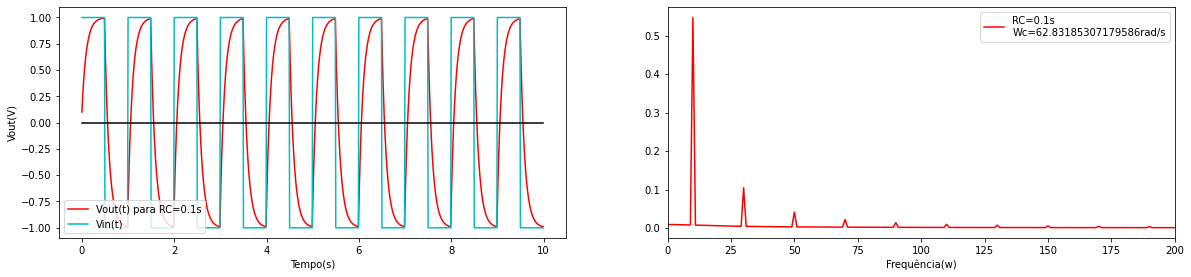

In [ ]:
#para RC=0.1s
plt.figure(figsize=(20,40))

plt.subplot(823)
plt.plot(Vout_aprox2[0],Vout_aprox2[1],'r',label="Vout(t) para RC=0.1s")
plt.plot(Vout_aprox2[0],Vin_0,'c',label="Vin(t)")
plt.plot(Vout_aprox1[0],V_0,'k')
plt.xlabel("Tempo(s)")
plt.ylabel("Vout(V)")
plt.legend()

plt.subplot(824)
plt.plot(abs(fft_Vout_2)/Vout_aprox2[2],'r',label="RC=0.1s\nWc="+str(w_corte(0.1))+"rad/s") #plot dos coeficientes de fourier da tensão de saída
plt.xlabel("Frequência(w)")
plt.xlim(0,200)
plt.legend()

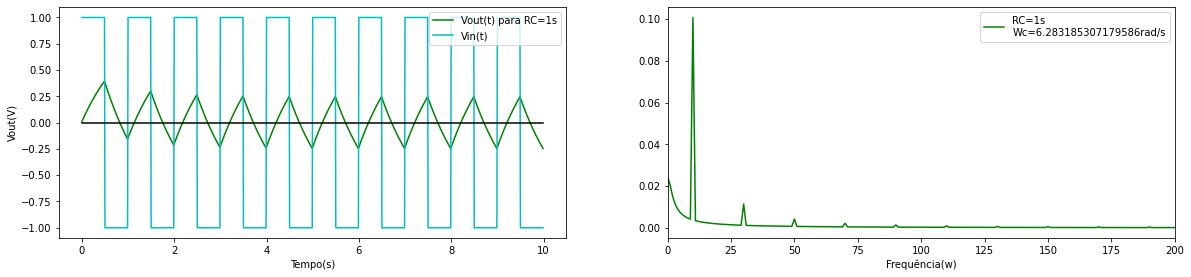

In [ ]:
#para RC=1s
plt.figure(figsize=(20,40))
plt.subplot(825)
plt.plot(Vout_aprox3[0],Vout_aprox3[1],'g',label="Vout(t) para RC=1s")
plt.plot(Vout_aprox3[0],Vin_0,'c',label="Vin(t)")
plt.plot(Vout_aprox1[0],V_0,'k')
plt.xlabel("Tempo(s)")
plt.ylabel("Vout(V)")
plt.legend()

plt.subplot(826)
plt.plot(abs(fft_Vout_3)/Vout_aprox3[2],'g',label="RC=1s\nWc="+str(w_corte(1))+"rad/s") #plot dos coeficientes de fourier da tensão de saída
plt.xlabel("Frequência(w)")
plt.xlim(0,200)
plt.legend()

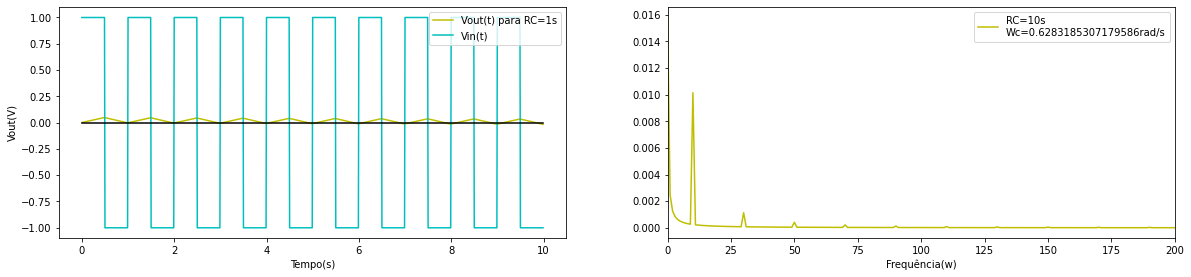

In [ ]:
#para RC=10s
plt.figure(figsize=(20,40))
plt.subplot(827)
plt.plot(Vout_aprox3[0],Vout_aprox4[1],'y',label="Vout(t) para RC=1s")
plt.plot(Vout_aprox3[0],Vin_0,'c',label="Vin(t)")
plt.plot(Vout_aprox1[0],V_0,'k')
plt.xlabel("Tempo(s)")
plt.ylabel("Vout(V)")
plt.legend()

plt.subplot(828)
plt.plot(abs(fft_Vout_4)/Vout_aprox4[2],'y',label="RC=10s\nWc="+str(w_corte(10))+"rad/s") #plot dos coeficientes de fourier da tensão de saída
plt.xlabel("Frequência(w)")
plt.xlim(0,200)
plt.legend()

5. As equações de Lotka–Volterra descrevem um modelo de interação entre
presas e predadores. Sejam as variáveis x e y proporcionais ao tamanho
de população de coelhos (presas) e raposas (predadores).
No modelo de Lotka–Volterra os coelhos reproduzem-se a uma taxa proporcional à sua população e são comidos pelas raposas a uma taxa proporcional à população de coelhos e raposas:


* dx/dt = αx − βx


onde α e β são constantes.

Ao mesmo tempo as raposas reproduzem-se a uma taxa proporcional à
taxa a que comem coelhos – porque precisam de comida para poderem
crescer e reproduzir-se – mas também morrem a partir de uma certa
idade a uma taxa proporcional à sua própria população:


* dy/dt = γxy − δy,


onde γ e δ também são constantes.

Resolva estas equações numericamente para α = 1, β = γ = 0.5 e δ = 2
com a condição inicial x = y = 2, fazendo o gráfico de ambas as populações em função do tempo. Assuma que a população quer de raposas
quer de coelhos é 100 vezes maior que y e x, respetivamente.Interprete
os gráficos obtidos.

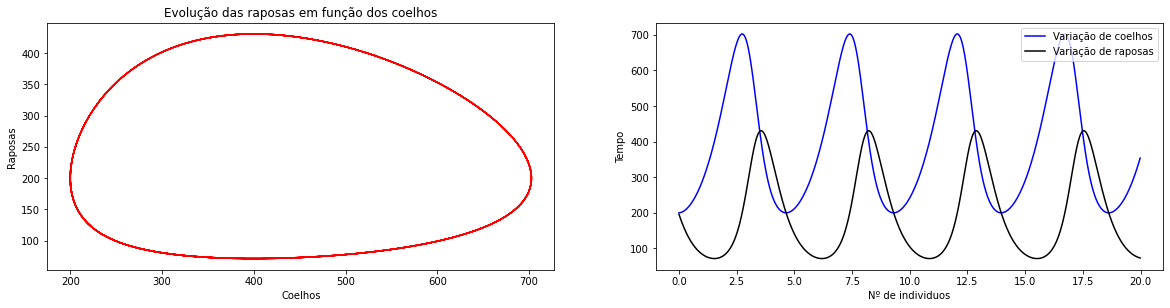

In [ ]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def func(r,t):
    x=r[0]
    y=r[1]
    x_deriv=x-0.5*x*y
    y_deriv=0.5*x*y-2*y
    return np.array([x_deriv,y_deriv],float)

def R_K4(f):
    N=1000
    a=0
    b=20
    h=(b-a)/N
    x_0=x=0  #condição inicial
    t_list=np.arange(a,b,h)
    x_p=[]
    y_p=[]
    r=np.array([2,2], float)
    for t in t_list:
        k1=h*f(r,t)
        k2=h*f(r+0.5*k1,t+0.5*h)
        k3=h*f(r+0.5*k2,t+0.5*h)
        k4=h*f(r+k3,t+0.5*h)
        r+=(k1+2*k2+2*k3+k4)/6
        x_p.append(100*r[0])
        y_p.append(100*r[1])
    return [x_p,y_p,t_list]

aprox=R_K4(func)

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(aprox[0],aprox[1],'r')
plt.xlabel('Coelhos')
plt.ylabel('Raposas')
plt.title('Evolução das raposas em função dos coelhos')

plt.subplot(222)
plt.plot(aprox[2],aprox[0],'b',label='Variação de coelhos')
plt.plot(aprox[2],aprox[1],'k',label='Variação de raposas')
plt.xlabel('Nº de individuos')
plt.ylabel('Tempo')
plt.legend()

6. Escreva um programa para resolver a equação diferencial
d^2x/dt2
−
(
dx/
dt)^2 + x + 5 = 0
usando o método do salto de rã (leapfrog method). Resolva entre t = 0 e
t = 40 em passos de h = 0.001 com as condições iniciais x = 1 e dx/dt = 0.
Represente a solução obtida (x em função de t).

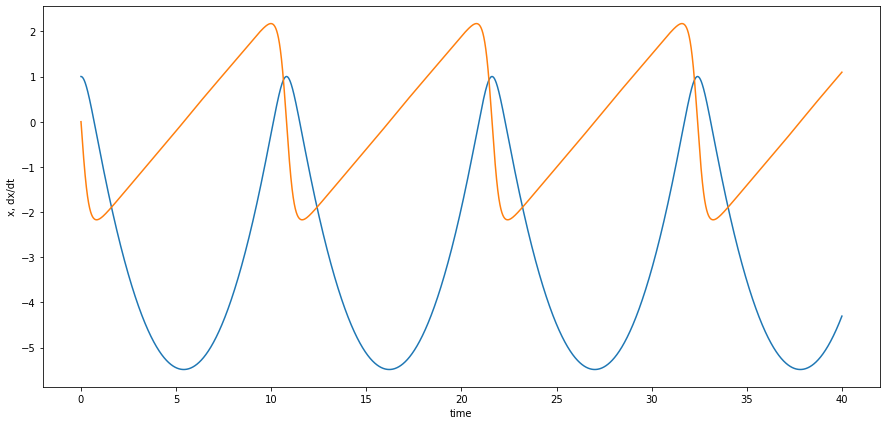

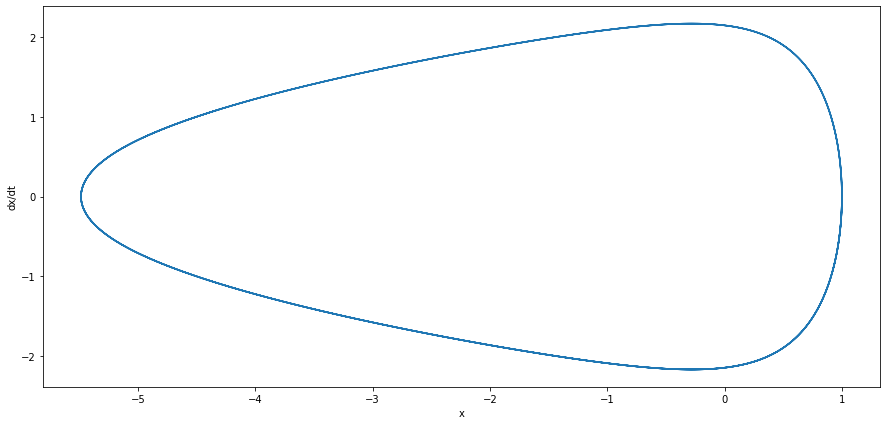

In [ ]:
from numpy import array,arange
from pylab import plot,show,xlabel,ylabel,legend,figure

a = 0.0
b = 40.0
h = 0.001

def f(r):
  x = r[0]
  v = r[1]
  fr = v
  fv = v**2 - x - 5
  return array([fr,fv],float)

tpoints = arange(a,b,h)
xpoints = []
vpoints = []

#valor inicial para os primeiros dois pontos
r1 = array([1.0,0.0],float)
r2 = r1 + 0.5*h*f(r1)

for t in tpoints:
  xpoints.append(r1[0])
  vpoints.append(r1[1])
  r1 += h*f(r2)
  r2 += h*f(r1)

figure(figsize=[15,7])
plot(tpoints,xpoints,label='x')
plot(tpoints,vpoints,label='dx/dt')
xlabel('time')
ylabel('x, dx/dt')
show()

figure(figsize=[15,7])
plot(xpoints,vpoints)
xlabel('x')
ylabel('dx/dt')
show()